In [3]:
!pip install openpyxl


   ---------------------------------------- 0/2 [et-xmlfile]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [open

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nb

Matplotlib is building the font cache; this may take a moment.


In [9]:
saledf = pd.read_excel(r"E:\DATA ANALYTICS\GitHub Repo\My Repo\DAFS\Python\SLA_Training\Sales_Analysis_Report.xlsx",sheet_name="Sales Orders",parse_dates=["Ship Date","OrderDate"])
custdf = pd.read_excel(r"E:\DATA ANALYTICS\GitHub Repo\My Repo\DAFS\Python\SLA_Training\Sales_Analysis_Report.xlsx",sheet_name="Customers")
regdf = pd.read_excel(r"E:\DATA ANALYTICS\GitHub Repo\My Repo\DAFS\Python\SLA_Training\Sales_Analysis_Report.xlsx",sheet_name="Regions")
proddf = pd.read_excel(r"E:\DATA ANALYTICS\GitHub Repo\My Repo\DAFS\Python\SLA_Training\Sales_Analysis_Report.xlsx",sheet_name="Products")

In [11]:
print(saledf.head())
print(custdf.head())
print(regdf.head())
print(proddf.head())

    OrderNumber  OrderDate  Ship Date  Customer Name Index      Channel  \
0   SO - 000225 2017-01-01 2017-01-13                   28    Wholesale   
1  SO - 0003378 2017-01-01 2017-01-06                    7  Distributor   
2  SO - 0003901 2017-01-01 2017-01-05                   12    Wholesale   
3  SO - 0005126 2017-01-01 2017-01-17                    5    Wholesale   
4  SO - 0005614 2017-01-01 2017-01-07                   27       Export   

  Currency Code Warehouse Code  Region Index  Product  Index  Order Quantity  \
0           NZD         AXW291            71              11               6   
1           NZD         AXW291            54               7              11   
2           NZD         AXW291            58              13               5   
3           USD         AXW291            29               7               6   
4           NZD         AXW291            31               6               7   

   Unit Price  Total Unit Cost  Total Revenue  
0      2499.1       

# EDA

# Null Handling

In [23]:
print("Sales:\n",saledf.isnull().sum())
print("---------------------------------------------------------------")

print("Customers:\n",custdf.isnull().sum())
print("---------------------------------------------------------------")

print("Region:\n",regdf.isnull().sum())
print("---------------------------------------------------------------")

print("Product:\n",proddf.isnull().sum())

Sales:
 OrderNumber            0
OrderDate              0
Ship Date              0
Customer Name Index    0
Channel                0
Currency Code          0
Warehouse Code         0
Region Index           0
Product  Index         0
Order Quantity         0
Unit Price             0
Total Unit Cost        0
Total Revenue          0
dtype: int64
---------------------------------------------------------------
Customers:
 Customer Index    0
Customer Names    0
dtype: int64
---------------------------------------------------------------
Region:
 Index           0
Suburb          0
City            0
postcode        0
Longitude       0
Latitude        0
Full Address    0
dtype: int64
---------------------------------------------------------------
Product:
 Index           0
Product Name    0
dtype: int64


 There is no NUll values in all Dataframs

In [24]:
print("Sales:\n",saledf.describe())
print("---------------------------------------------------------------")

print("Customers:\n",custdf.describe())
print("---------------------------------------------------------------")

print("Region:\n",regdf.describe())
print("---------------------------------------------------------------")

print("Product:\n",proddf.describe())

Sales:
                            OrderDate                      Ship Date  \
count                           7991                           7991   
mean   2018-06-22 01:36:56.944061952  2018-07-02 12:04:35.710173952   
min              2017-01-01 00:00:00            2017-01-05 00:00:00   
25%              2017-09-23 00:00:00            2017-10-03 00:00:00   
50%              2018-06-20 00:00:00            2018-07-01 00:00:00   
75%              2019-03-20 00:00:00            2019-04-01 00:00:00   
max              2019-12-12 00:00:00            2019-12-28 00:00:00   
std                              NaN                            NaN   

       Customer Name Index  Region Index  Product  Index  Order Quantity  \
count          7991.000000   7991.000000     7991.000000     7991.000000   
mean             25.457014     50.454261        6.340383        8.456889   
min               1.000000      1.000000        1.000000        5.000000   
25%              13.000000     25.000000        

In [25]:
print("Sales:\n",saledf.info())
print("---------------------------------------------------------------")
print("Customers:\n",custdf.info())
print("---------------------------------------------------------------")
print("Region:\n",regdf.info())
print("---------------------------------------------------------------")

print("Product:\n",proddf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   OrderNumber          7991 non-null   object        
 1   OrderDate            7991 non-null   datetime64[ns]
 2   Ship Date            7991 non-null   datetime64[ns]
 3   Customer Name Index  7991 non-null   int64         
 4   Channel              7991 non-null   object        
 5   Currency Code        7991 non-null   object        
 6   Warehouse Code       7991 non-null   object        
 7   Region Index         7991 non-null   int64         
 8   Product  Index       7991 non-null   int64         
 9   Order Quantity       7991 non-null   int64         
 10  Unit Price           7991 non-null   float64       
 11  Total Unit Cost      7991 non-null   float64       
 12  Total Revenue        7991 non-null   float64       
dtypes: datetime64[ns](2), float64(3),

In [30]:
df = pd.merge(left=saledf,right=custdf,left_on="Customer Name Index",right_on="Customer Index",how="inner")
df = pd.merge(left=df,right=regdf,left_on="Region Index",right_on="Index",how="inner")
df = pd.merge(left=df,right=proddf,left_on="Product  Index",right_on="Index",how="inner")

In [ ]:

df.head()

,OrderNumber,OrderDate,Ship Date,Customer Name Index,Channel,Currency Code,Warehouse Code,Region Index,Product Index,Order Quantity,...,Full Address_x,Index_y,Suburb_y,City_y,postcode_y,Longitude_y,Latitude_y,Full Address_y,Index,Product Name
0,SO - 000225,2017-01-01,2017-01-13,28,Wholesale,NZD,AXW291,71,11,6,...,"The Terraces, Wanaka, Queenstown-Lakes",71,Wanaka,Queenstown-Lakes,9305,169.128174,-44.670586,"The Terraces, Wanaka, Queenstown-Lakes",11,Product 11
1,SO - 0003378,2017-01-01,2017-01-06,7,Distributor,NZD,AXW291,54,7,11,...,"Victoria Park Road, Cashmere, Christchurch",54,Cashmere,Christchurch,8022,172.637838,-43.583878,"Victoria Park Road, Cashmere, Christchurch",7,Product 7
2,SO - 0003901,2017-01-01,2017-01-05,12,Wholesale,NZD,AXW291,58,13,5,...,"Charmaine Crescent, Chartwell, Hamilton",58,Chartwell,Hamilton,3210,175.269405,-37.759953,"Charmaine Crescent, Chartwell, Hamilton",13,Product 13
3,SO - 0005126,2017-01-01,2017-01-17,5,Wholesale,USD,AXW291,29,7,6,...,"Elizabeth Place, Timaru Central, Timaru",29,Timaru Central,Timaru,7910,171.249248,-44.394775,"Elizabeth Place, Timaru Central, Timaru",7,Product 7
4,SO - 0005614,2017-01-01,2017-01-07,27,Export,NZD,AXW291,31,6,7,...,"Siena Place, Te Atatu Peninsula, Waitakere",31,Te Atatu Peninsula,Waitakere,610,174.655242,-36.843942,"Siena Place, Te Atatu Peninsula, Waitakere",6,Product 6


In [33]:
colums = ['Customer Name Index','Index_x','Index_y']
df.drop(axis=1,columns=colums,inplace=True)

In [34]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Ship Date', 'Channel', 'Currency Code',
       'Warehouse Code', 'Region Index', 'Product  Index', 'Order Quantity',
       'Unit Price', 'Total Unit Cost', 'Total Revenue', 'Customer Index',
       'Customer Names', 'Suburb', 'City', 'postcode', 'Longitude', 'Latitude',
       'Full Address', 'Product Name'],
      dtype='object')

In [35]:
df.head()

,OrderNumber,OrderDate,Ship Date,Channel,Currency Code,Warehouse Code,Region Index,Product Index,Order Quantity,Unit Price,...,Total Revenue,Customer Index,Customer Names,Suburb,City,postcode,Longitude,Latitude,Full Address,Product Name
0,SO - 000225,2017-01-01,2017-01-13,Wholesale,NZD,AXW291,71,11,6,2499.1,...,14994.6,28,Dharma Ltd,Wanaka,Queenstown-Lakes,9305,169.128174,-44.670586,"The Terraces, Wanaka, Queenstown-Lakes",Product 11
1,SO - 0003378,2017-01-01,2017-01-06,Distributor,NZD,AXW291,54,7,11,2351.7,...,25868.7,7,New Ltd,Cashmere,Christchurch,8022,172.637838,-43.583878,"Victoria Park Road, Cashmere, Christchurch",Product 7
2,SO - 0003901,2017-01-01,2017-01-05,Wholesale,NZD,AXW291,58,13,5,1728.6,...,8643.0,12,Medline,Chartwell,Hamilton,3210,175.269405,-37.759953,"Charmaine Crescent, Chartwell, Hamilton",Product 13
3,SO - 0005126,2017-01-01,2017-01-17,Wholesale,USD,AXW291,29,7,6,978.2,...,5869.2,5,Procter Corp,Timaru Central,Timaru,7910,171.249248,-44.394775,"Elizabeth Place, Timaru Central, Timaru",Product 7
4,SO - 0005614,2017-01-01,2017-01-07,Export,NZD,AXW291,31,6,7,2338.3,...,16368.1,27,Wuxi Group,Te Atatu Peninsula,Waitakere,610,174.655242,-36.843942,"Siena Place, Te Atatu Peninsula, Waitakere",Product 6


In [36]:
df.isnull().sum()

OrderNumber        0
OrderDate          0
Ship Date          0
Channel            0
Currency Code      0
Warehouse Code     0
Region Index       0
Product  Index     0
Order Quantity     0
Unit Price         0
Total Unit Cost    0
Total Revenue      0
Customer Index     0
Customer Names     0
Suburb             0
City               0
postcode           0
Longitude          0
Latitude           0
Full Address       0
Product Name       0
dtype: int64

In [37]:
df.describe()

,OrderDate,Ship Date,Region Index,Product Index,Order Quantity,Unit Price,Total Unit Cost,Total Revenue,Customer Index,postcode,Longitude,Latitude
count,7991,7991,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,2018-06-22 01:36:56.944061952,2018-07-02 12:04:35.710173952,50.454261,6.340383,8.456889,2284.536504,1431.911054,19343.403904,25.457014,4316.970842,174.210973,-39.738080
min,2017-01-01 00:00:00,2017-01-05 00:00:00,1.000000,1.000000,5.000000,167.500000,68.675000,837.500000,1.000000,112.000000,168.028823,-46.905258
25%,2017-09-23 00:00:00,2017-10-03 00:00:00,25.000000,2.000000,6.000000,1031.800000,606.115500,7959.600000,13.000000,2024.000000,173.109791,-41.377238
50%,2018-06-20 00:00:00,2018-07-01 00:00:00,50.000000,7.000000,8.000000,1849.200000,1080.576000,13989.600000,25.000000,3510.000000,174.870013,-38.675235
75%,2019-03-20 00:00:00,2019-04-01 00:00:00,76.000000,11.000000,10.000000,3611.300000,2040.250500,27436.500000,38.000000,7022.000000,175.565276,-36.953248
max,2019-12-12 00:00:00,2019-12-28 00:00:00,100.000000,14.000000,12.000000,6566.000000,5498.556000,78711.600000,50.000000,9818.000000,178.079269,-35.383953
std,NaN,NaN,28.862791,4.116455,2.283776,1673.096364,1112.413043,15586.133406,14.414883,2893.700178,2.124544,3.172212


The data contains 3 Years (2017,2019) Product sales data with customers,Region details 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderNumber      7991 non-null   object        
 1   OrderDate        7991 non-null   datetime64[ns]
 2   Ship Date        7991 non-null   datetime64[ns]
 3   Channel          7991 non-null   object        
 4   Currency Code    7991 non-null   object        
 5   Warehouse Code   7991 non-null   object        
 6   Region Index     7991 non-null   int64         
 7   Product  Index   7991 non-null   int64         
 8   Order Quantity   7991 non-null   int64         
 9   Unit Price       7991 non-null   float64       
 10  Total Unit Cost  7991 non-null   float64       
 11  Total Revenue    7991 non-null   float64       
 12  Customer Index   7991 non-null   int64         
 13  Customer Names   7991 non-null   object        
 14  Suburb           7991 non-null   object 

## Q1: You’ve been given a sales dataset with fields: OrderID, CustomerID, Product, SalesAmount, OrderDate.
Task: Identify trends over time, top-selling products, and customer purchasing behavior.

In [110]:
dfq1 = df[['OrderDate','OrderNumber','Customer Index','Customer Names','Product Name','Unit Price','Order Quantity','Total Unit Cost','Total Revenue','Channel','City']]
dfq1

,OrderDate,OrderNumber,Customer Index,Customer Names,Product Name,Unit Price,Order Quantity,Total Unit Cost,Total Revenue,Channel,City
0,2017-01-01,SO - 000225,28,Dharma Ltd,Product 11,2499.1,6,1824.343,14994.6,Wholesale,Queenstown-Lakes
1,2017-01-01,SO - 0003378,7,New Ltd,Product 7,2351.7,11,1269.918,25868.7,Distributor,Christchurch
2,2017-01-01,SO - 0003901,12,Medline,Product 13,1728.6,5,1019.874,8643.0,Wholesale,Hamilton
3,2017-01-01,SO - 0005126,5,Procter Corp,Product 7,978.2,6,684.740,5869.2,Wholesale,Timaru
4,2017-01-01,SO - 0005614,27,Wuxi Group,Product 6,2338.3,7,1028.852,16368.1,Export,Waitakere
...,...,...,...,...,...,...,...,...,...,...,...
7986,2019-12-12,SO - 0005237,41,Weimei Corp,Product 9,261.3,7,107.133,1829.1,Wholesale,Napier
7987,2019-12-12,SO - 0005477,28,Dharma Ltd,Product 2,1996.6,7,1477.484,13976.2,Distributor,Christchurch
7988,2019-12-12,SO - 0006936,30,S.S.S. Group,Product 1,3912.8,9,2817.216,35215.2,Wholesale,Dunedin
7989,2019-12-12,SO - 0007126,6,"PEDIFIX, Corp",Product 5,1855.9,10,1113.540,18559.0,Distributor,Waitakere


In [ ]:
dfq1['year'] = dfq1['OrderDate'].dt.year
dfq1['month'] = dfq1['OrderDate'].dt.month

In [120]:
dfq1

,OrderDate,OrderNumber,Customer Index,Customer Names,Product Name,Unit Price,Order Quantity,Total Unit Cost,Total Revenue,Channel,City,year,month
0,2017-01-01,SO - 000225,28,Dharma Ltd,Product 11,2499.1,6,1824.343,14994.6,Wholesale,Queenstown-Lakes,2017,1
1,2017-01-01,SO - 0003378,7,New Ltd,Product 7,2351.7,11,1269.918,25868.7,Distributor,Christchurch,2017,1
2,2017-01-01,SO - 0003901,12,Medline,Product 13,1728.6,5,1019.874,8643.0,Wholesale,Hamilton,2017,1
3,2017-01-01,SO - 0005126,5,Procter Corp,Product 7,978.2,6,684.740,5869.2,Wholesale,Timaru,2017,1
4,2017-01-01,SO - 0005614,27,Wuxi Group,Product 6,2338.3,7,1028.852,16368.1,Export,Waitakere,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,2019-12-12,SO - 0005237,41,Weimei Corp,Product 9,261.3,7,107.133,1829.1,Wholesale,Napier,2019,12
7987,2019-12-12,SO - 0005477,28,Dharma Ltd,Product 2,1996.6,7,1477.484,13976.2,Distributor,Christchurch,2019,12
7988,2019-12-12,SO - 0006936,30,S.S.S. Group,Product 1,3912.8,9,2817.216,35215.2,Wholesale,Dunedin,2019,12
7989,2019-12-12,SO - 0007126,6,"PEDIFIX, Corp",Product 5,1855.9,10,1113.540,18559.0,Distributor,Waitakere,2019,12


## Trend Over Time

In [140]:
dfq1.groupby(['year'])['Total Revenue'].sum().reset_index()

,year,Total Revenue
0,2017,52580534.7
1,2018,53463661.7
2,2019,48528944.2


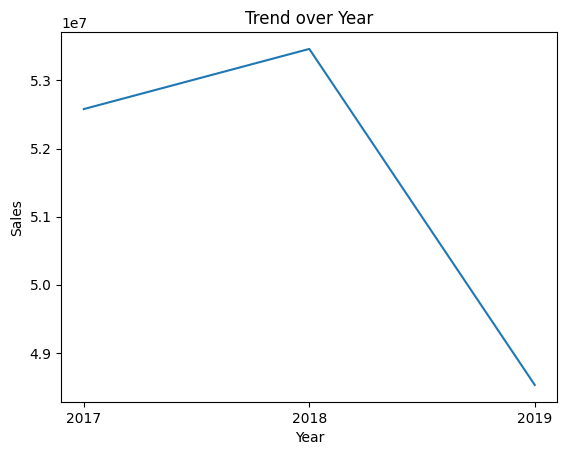

In [ ]:
data = dfq1.groupby(['year'])['Total Revenue'].sum().reset_index()
sns.lineplot(data=data,x='year',y='Total Revenue',errorbar=None)
plt.title('Trend over Year')
plt.xticks(dfq1['year'].unique())
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In year 2019 there is sales drop compared previous years.

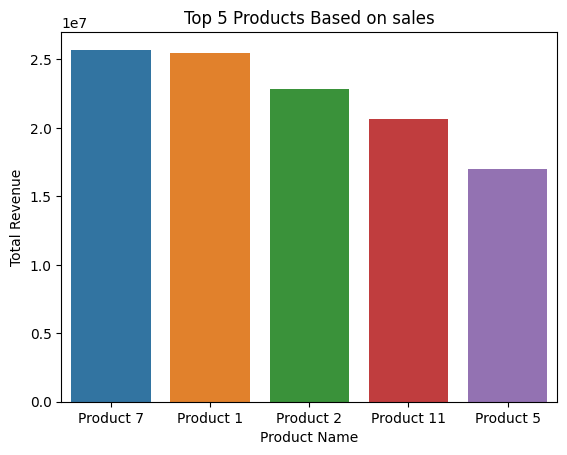

In [141]:
data = dfq1.groupby(['Product Name'])[['Total Revenue']].sum().reset_index().sort_values(ascending=False,by='Total Revenue').head(5)
plt.Figure(figsize=(10,5))
sns.barplot(data=data,x='Product Name',y='Total Revenue',errorbar=None,hue='Product Name')
plt.title("Top 5 Products Based on sales")
plt.show()

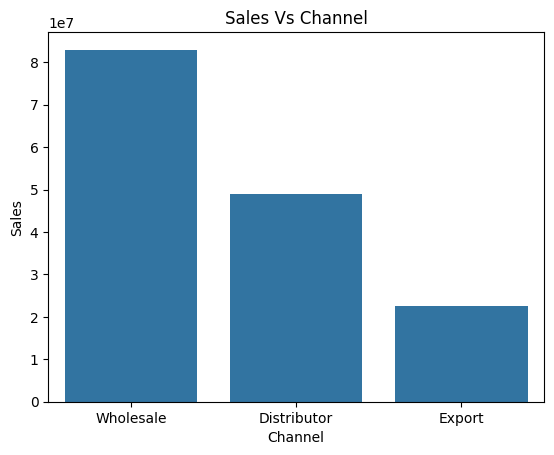

In [135]:
sns.barplot(data=dfq1.groupby(['Channel'])['Total Revenue'].sum().reset_index().sort_values(ascending=False,by='Total Revenue'),x="Channel",y="Total Revenue",errorbar=None)
plt.title("Sales Vs Channel")
plt.xlabel("Channel")
plt.ylabel("Sales")
plt.show()

Customers Willing to buy products through Wholesale

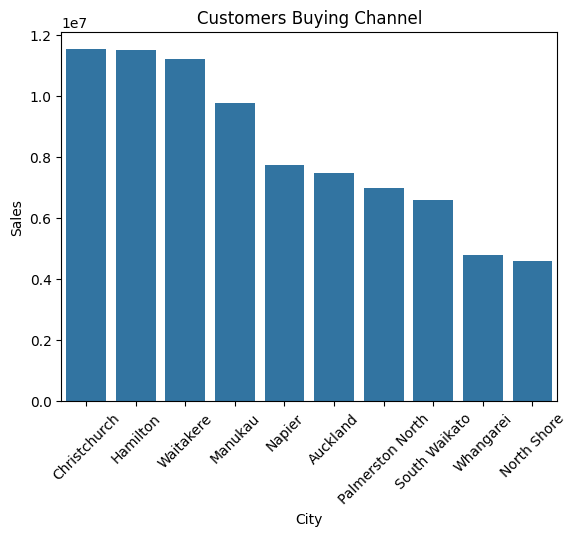

In [139]:
sns.barplot(data=dfq1.groupby(['City'])['Total Revenue'].sum().reset_index().sort_values(ascending=False,by='Total Revenue').head(10),x='City',y="Total Revenue",errorbar=None)
plt.title("Customers Buying Channel")
plt.xlabel("City")
plt.xticks(rotation = 45)
plt.ylabel("Sales")
plt.show()

Customers from Christchurch,Hamilton,Waitakere buying more products from other cities

In [142]:
dfq1.groupby(['City'])['Total Revenue'].sum().reset_index().sort_values(ascending=False,by='Total Revenue').head(10)

,City,Total Revenue
2,Christchurch,11526693.4
8,Hamilton,11490895.3
39,Waitakere,11193020.0
13,Manukau,9759802.9
15,Napier,7748503.1
0,Auckland,7463277.4
19,Palmerston North,6967477.4
26,South Waikato,6586897.3
44,Whangarei,4781240.6
18,North Shore,4604990.4


## Q2: You observe a sudden drop in revenue last month.
Task: Use data to explain what went wrong (product returns, fewer orders, lower AOV?).

In [157]:
df1 = pd.read_csv(r'E:\DATA ANALYTICS\GitHub Repo\My Repo\DAFS\MOck\Pandas\orders_data.csv',parse_dates=['order_date'])
df1.head()

,order_id,product_id,order_date,order_value,return_value
0,1,104,2023-09-08,128.87,1.11
1,2,105,2023-01-25,122.88,8.61
2,3,103,2023-03-06,159.94,6.47
3,4,104,2023-08-31,168.89,1.00
4,5,104,2023-05-01,115.71,11.19


In [179]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      1000 non-null   int64         
 1   product_id    1000 non-null   int64         
 2   order_date    1000 non-null   datetime64[ns]
 3   order_value   1000 non-null   float64       
 4   return_value  1000 non-null   float64       
 5   month         1000 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int64(2), period[M](1)
memory usage: 47.0 KB


In [178]:
df1.describe()

,order_id,product_id,order_date,order_value,return_value
count,1000.000000,1000.000000,1000,1000.000000,1000.000000
mean,500.500000,102.995000,2023-05-17 11:51:21.600000256,111.634500,5.708110
min,1.000000,101.000000,2023-01-01 00:00:00,20.030000,0.010000
25%,250.750000,102.000000,2023-03-08 18:00:00,66.872500,2.097500
50%,500.500000,103.000000,2023-05-16 00:00:00,112.850000,4.530000
75%,750.250000,104.000000,2023-07-30 00:00:00,154.402500,8.642500
max,1000.000000,105.000000,2023-10-01 00:00:00,199.990000,19.600000
std,288.819436,1.417386,NaN,51.023471,4.477533


In [190]:
df1p = df1.groupby(['month','product_id'])[['order_value','return_value']].sum().reset_index()
df1p

,month,product_id,order_value,return_value
0,2023-01,101,2773.54,135.70
1,2023-01,102,2047.12,81.48
2,2023-01,103,2678.83,163.02
3,2023-01,104,1897.65,100.82
4,2023-01,105,3686.53,153.99
5,2023-02,101,1843.66,98.75
6,2023-02,102,2295.93,131.39
7,2023-02,103,1984.90,111.01
8,2023-02,104,3437.19,143.34
9,2023-02,105,2326.24,91.43


In [189]:
df1.groupby(['product_id'])[['order_value','return_value']].sum().reset_index().sort_values(by='return_value',ascending=False)

,product_id,order_value,return_value
2,103,22534.43,1180.35
0,101,22277.66,1175.84
1,102,22094.10,1134.78
4,105,23346.14,1112.45
3,104,21382.17,1104.69


Product 103 has high return value

In [196]:
df1p[df1p['product_id']==103].sort_values(by='order_value',ascending=False)

,month,product_id,order_value,return_value
12,2023-03,103,3963.76,189.74
37,2023-08,103,3062.37,144.04
32,2023-07,103,2689.29,148.37
2,2023-01,103,2678.83,163.02
17,2023-04,103,2390.56,139.87
42,2023-09,103,2079.60,115.43
22,2023-05,103,2034.97,88.71
7,2023-02,103,1984.90,111.01
27,2023-06,103,1650.15,80.16


In [ ]:
df1p[df1p['product_id']==103].sort_values(by='return_value',ascending=False)

,month,product_id,order_value,return_value
12,2023-03,103,3963.76,189.74
2,2023-01,103,2678.83,163.02
32,2023-07,103,2689.29,148.37
37,2023-08,103,3062.37,144.04
17,2023-04,103,2390.56,139.87
42,2023-09,103,2079.60,115.43
7,2023-02,103,1984.90,111.01
22,2023-05,103,2034.97,88.71
27,2023-06,103,1650.15,80.16


In [161]:
df1['month']= df1['order_date'].dt.to_period('M')

In [197]:
df1

,order_id,product_id,order_date,order_value,return_value,month
0,1,104,2023-09-08,128.87,1.11,2023-09
1,2,105,2023-01-25,122.88,8.61,2023-01
2,3,103,2023-03-06,159.94,6.47,2023-03
3,4,104,2023-08-31,168.89,1.00,2023-08
4,5,104,2023-05-01,115.71,11.19,2023-05
...,...,...,...,...,...,...
995,996,105,2023-09-27,123.64,12.01,2023-09
996,997,105,2023-06-03,56.24,0.35,2023-06
997,998,105,2023-01-23,66.89,6.52,2023-01
998,999,104,2023-04-04,118.88,2.15,2023-04


In [199]:
dfm = df1.groupby(['month']).aggregate(orders = ('order_id','count'), sales = ('order_value','sum'),returns = ('return_value','sum'),avg_sale=('order_value','mean')).reset_index()
dfm

,month,orders,sales,returns,avg_sale
0,2023-01,116,13083.67,635.01,112.790259
1,2023-02,101,11887.92,575.92,117.702178
2,2023-03,134,15237.38,769.43,113.711791
3,2023-04,96,10539.77,541.24,109.789271
4,2023-05,102,12073.69,604.07,118.369510
5,2023-06,100,11300.62,582.53,113.006200
6,2023-07,105,11520.84,639.87,109.722286
7,2023-08,125,13181.52,693.80,105.452160
8,2023-09,120,12634.07,663.06,105.283917
9,2023-10,1,175.02,3.18,175.020000


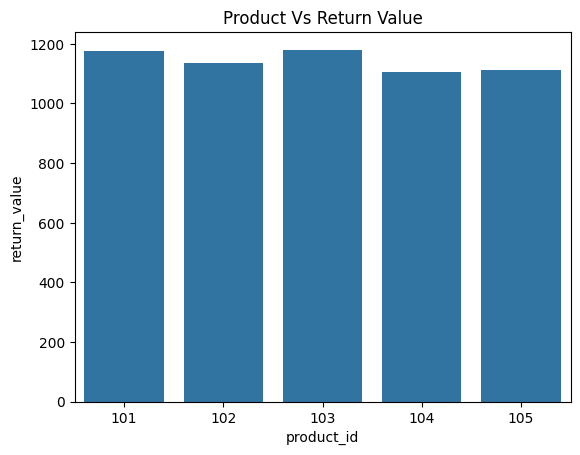

In [210]:
data = df1.groupby(['product_id'])[['return_value']].sum().reset_index().sort_values(by='return_value',ascending=False)
sns.barplot(data,x='product_id',y='return_value',errorbar=None)
plt.title("Product Vs Return Value")
plt.show()

In [217]:
dfm

,month,orders,sales,returns,avg_sale
0,2023-01,116,13083.67,635.01,112.790259
1,2023-02,101,11887.92,575.92,117.702178
2,2023-03,134,15237.38,769.43,113.711791
3,2023-04,96,10539.77,541.24,109.789271
4,2023-05,102,12073.69,604.07,118.369510
5,2023-06,100,11300.62,582.53,113.006200
6,2023-07,105,11520.84,639.87,109.722286
7,2023-08,125,13181.52,693.80,105.452160
8,2023-09,120,12634.07,663.06,105.283917
9,2023-10,1,175.02,3.18,175.020000


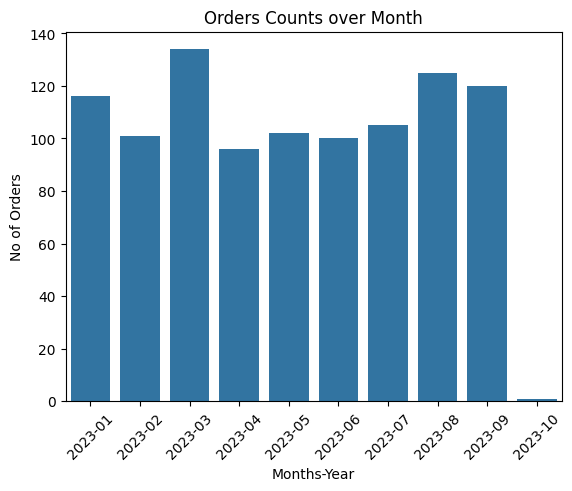

In [223]:
sns.barplot(data=dfm,x="month",y="orders",errorbar=None)
plt.xticks(rotation=45)
plt.title("Orders Counts over Month")
plt.xlabel("Months-Year")
plt.ylabel("No of Orders")
plt.show()

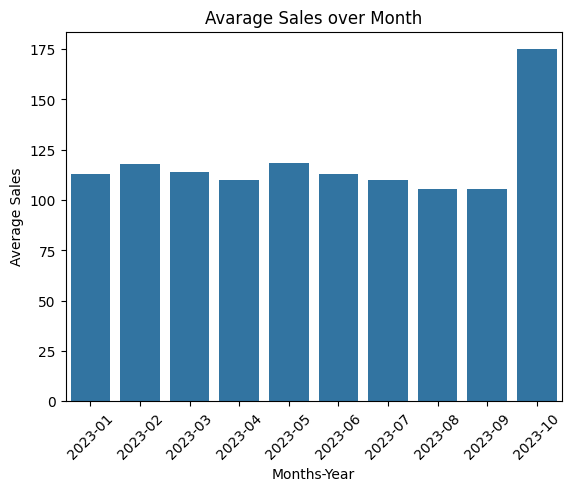

In [225]:
sns.barplot(data=dfm,x="month",y='avg_sale',errorbar=None)
plt.xticks(rotation=45)
plt.title("Avarage Sales over Month")
plt.xlabel("Months-Year")
plt.ylabel("Average Sales")
plt.show()

In 10-2023 there is low number of orders recived and it have only one day sales. so we can consider other months only

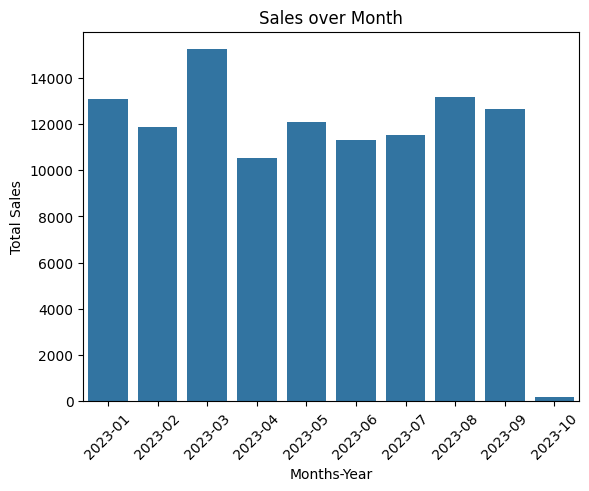

In [226]:
sns.barplot(data=dfm,x="month",y='sales',errorbar=None)
plt.xticks(rotation=45)
plt.title("Sales over Month")
plt.xlabel("Months-Year")
plt.ylabel("Total Sales")
plt.show()

1. There is sales drop in April 2023 and the data shows that high sales in previous month(mar 2023).
2. Low order recorded in April 2023 and high order recored in march 2023.
3. Average sales volume degreased in August and September. Returns record also slighlty high on that period.
4. Product 103 has high return value